In [1]:
import matplotlib

In [2]:
import pandas as pd
df = pd.read_json('output_TOSarsaAgent_mediumGrid_Alpha_0.2_Epsilon_0.05_Gamma_0.8_Lambda_0.9.json')
df1=pd.read_json('output_ApproximateQAgent_mediumGrid_Alpha_0.0.json')

In [3]:
df

,TrainingEpisodeNumber,TotalAverageReward,RewardforEpisode
0,1,-493.000000,-493
1,2,18.000000,529
2,3,186.333333,523
3,4,272.000000,529
4,5,323.400000,529
...,...,...,...
1995,1996,482.931864,527
1996,1997,482.954432,528
1997,1998,482.977477,529
1998,1999,482.999500,527


In [4]:
# !pip install --user matplotlib
# !pip install --user pandas
# !pip install --user pandas --upgrade --ignore-installed
# !python -m pip install --upgrade pip

In [5]:
# df=df[:100]

In [6]:
# df1=df1[:100]

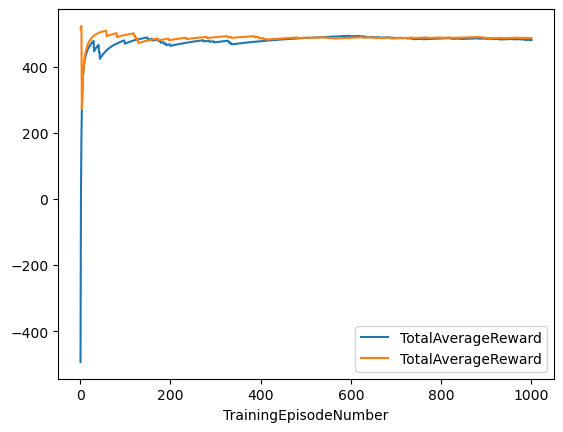

In [7]:
ax = df[:1000].plot(x='TrainingEpisodeNumber',y='TotalAverageReward')
ay=df1[:1000].plot(x='TrainingEpisodeNumber',y='TotalAverageReward',ax=ax)

In [7]:
import os
# layouts = os.listdir('./layouts')
layouts=[ 'generatedlayout0.lay']
print(layouts)
rates=[0.1,0.3,0.5,0.7,0.9]
for i in layouts:
    inst=0
    print('Starting for AprroxQ')
    os.system('python pacman.py -p ApproximateQAgent -a extractor=SimpleExtractor,inst='+str(inst)+' -x 2000 -n 2000 -l '+i)
    for j in rates:
        print('training layout:',i,', tdrate:',j, 'instace:' ,inst)
        
        print('Starting for TOS')
        os.system('python pacman.py -p TOSarsaAgent -a extractor=SimpleExtractor,tDRate='+str(j)+',inst='+str(inst)+' -x 2000 -n 2000 -l '+i)
        inst+=1

['generatedlayout0.lay']
Starting for AprroxQ
training layout: generatedlayout0.lay , tdrate: 0.1 instace: 0
Starting for TOS
training layout: generatedlayout0.lay , tdrate: 0.3 instace: 1
Starting for TOS
training layout: generatedlayout0.lay , tdrate: 0.5 instace: 2
Starting for TOS
training layout: generatedlayout0.lay , tdrate: 0.7 instace: 3
Starting for TOS
training layout: generatedlayout0.lay , tdrate: 0.9 instace: 4
Starting for TOS


loaded all jsons
capsuleClassic.lay
0.1
0.3
0.5
0.7
0.9
contestClassic.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout0.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout1.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout10.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout11.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout12.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout13.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout14.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout15.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout16.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout17.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout18.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout19.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout2.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout3.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout4.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout5.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout6.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout7.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout8.lay
0.1
0.3
0.5
0.7
0.9
generatedlayout9.lay
0.1
0.3
0.5
0.7
0.9
mediumClassic.lay
0.1
0.3
0.5
0.7
0.9
mediumGrid.lay
0.1
0.3
0.5
0.7
0.9
mi

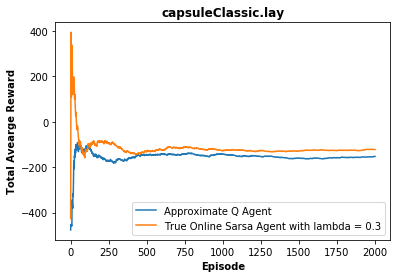

contestClassic.lay


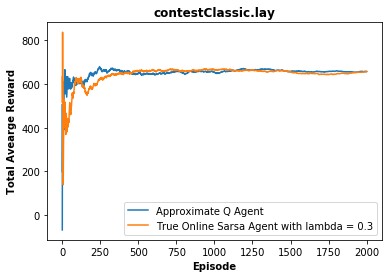

generatedlayout0.lay


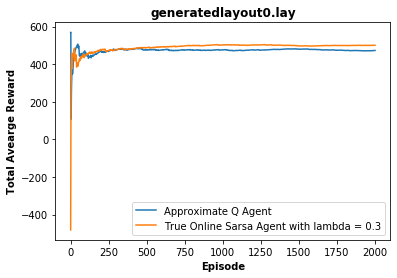

generatedlayout1.lay


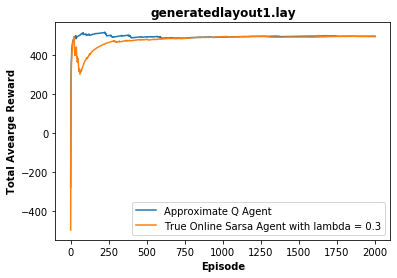

generatedlayout10.lay


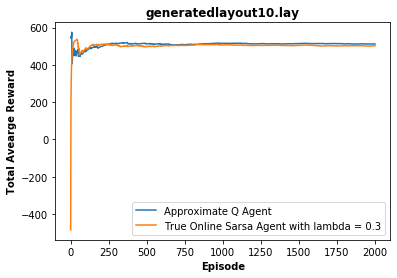

generatedlayout11.lay


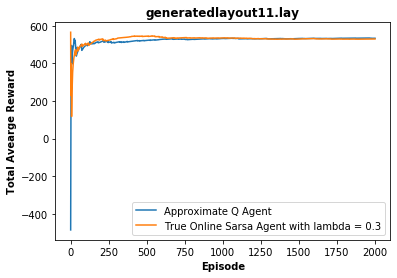

generatedlayout12.lay


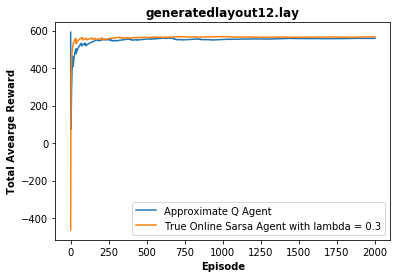

generatedlayout13.lay


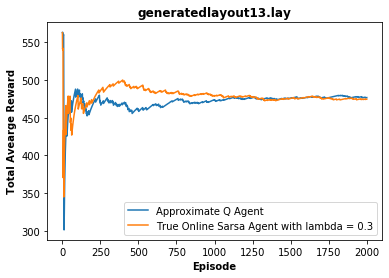

generatedlayout14.lay


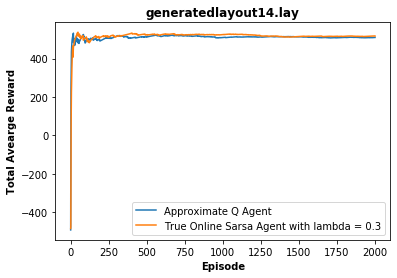

generatedlayout15.lay


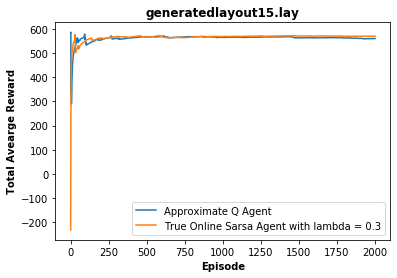

generatedlayout16.lay


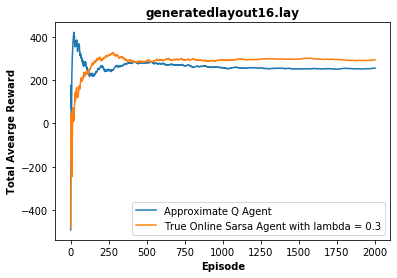

generatedlayout17.lay


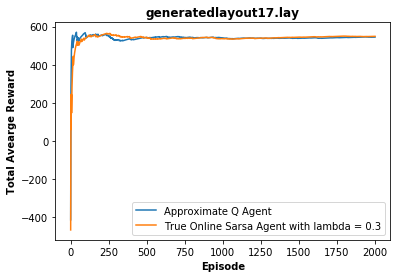

generatedlayout18.lay


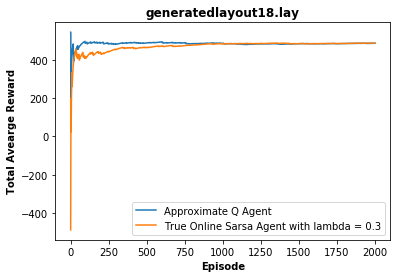

generatedlayout19.lay


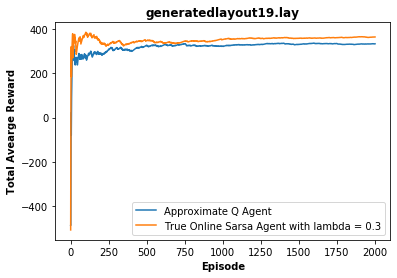

generatedlayout2.lay


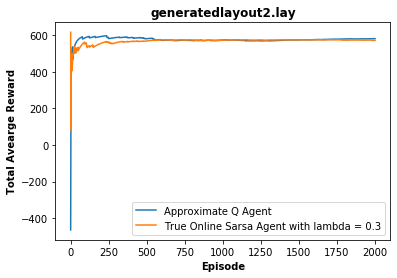

generatedlayout3.lay


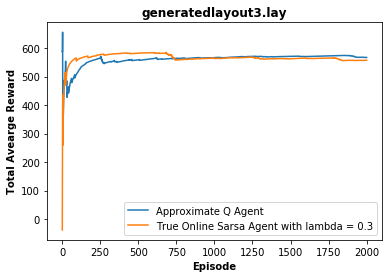

generatedlayout4.lay


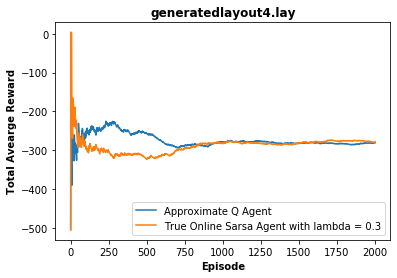

generatedlayout5.lay


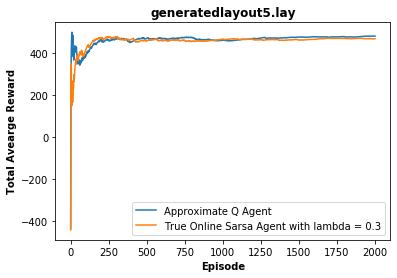

generatedlayout6.lay


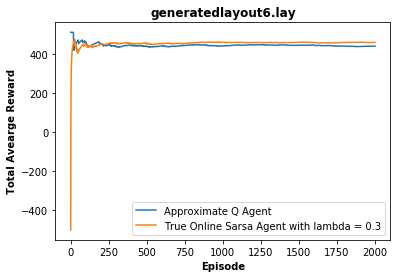

generatedlayout7.lay


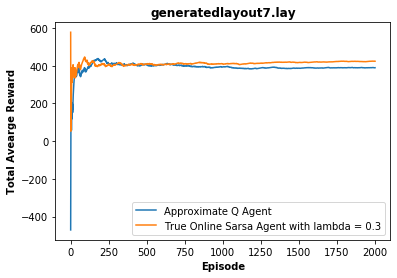

generatedlayout8.lay


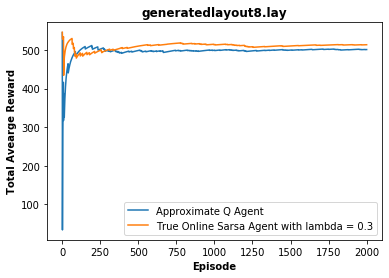

generatedlayout9.lay


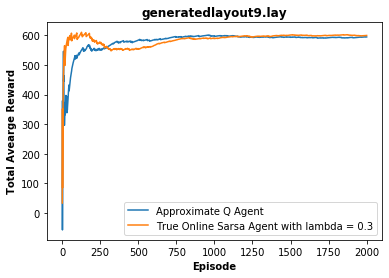

mediumClassic.lay


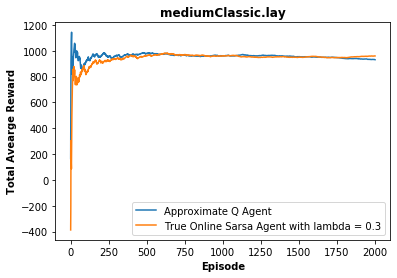

mediumGrid.lay


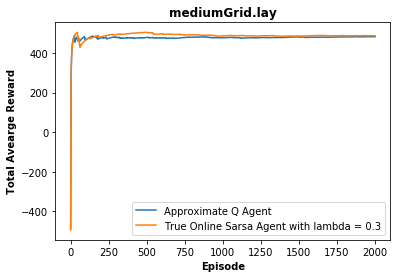

minimaxClassic.lay


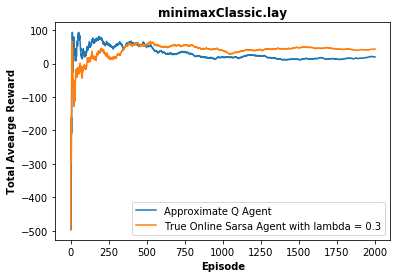

openClassic.lay


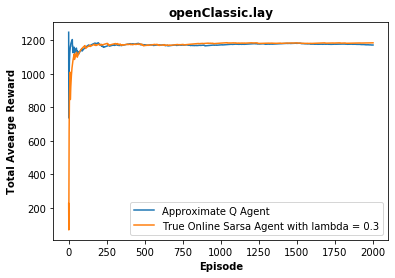

originalClassic.lay


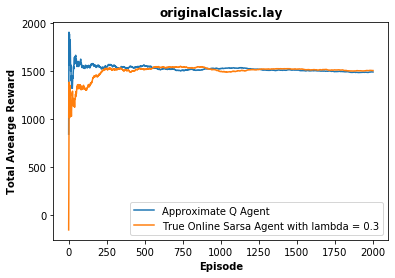

powerClassic.lay


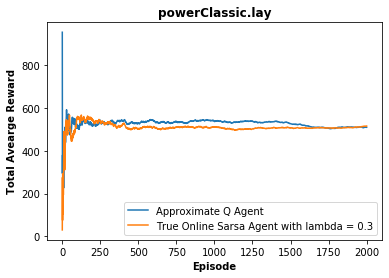

smallClassic.lay


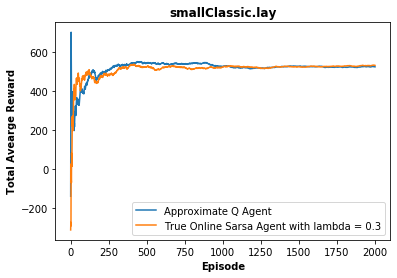

smallGrid.lay


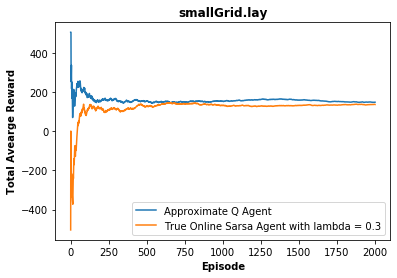

testClassic.lay


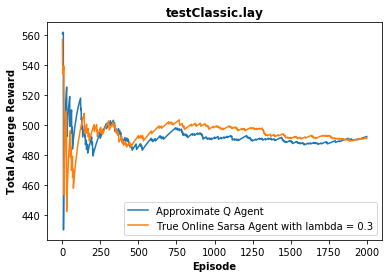

trappedClassic.lay


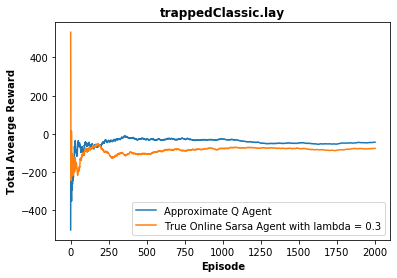

trickyClassic.lay


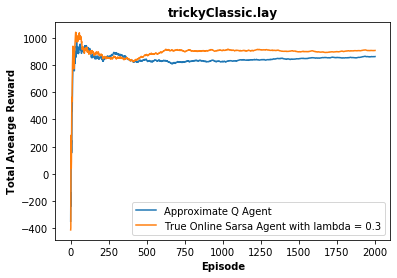

In [13]:
import math
import os
import numpy as np
import pandas as pd
import statistics as st
mps = os.listdir('./modelperformance')
agents = ['TOSarsaAgent','ApproximateQAgent']
Rewards = {}
mapdf={}
for mp in mps:
    df = pd.read_json('./modelperformance/'+mp)
    mapdf[mp]=df
print('loaded all jsons')
layouts = os.listdir('./layouts')
agents = ['TOSarsaAgent','ApproximateQAgent']
# rates=[0.1,0.3,0.5,0.7,0.9]
rates=[0.3]
Rewards['TOSarsaAgent'] = {}
Rewards['ApproximateQAgent'] = {}
for layout in layouts:
    print(layout)
    approxnm='output_ApproximateQAgent_'+layout+'_Alpha_0.0_Instance_0.json'
    qdf=mapdf[approxnm]
    Rewards[agents[1]][layout]=qdf[0:2000]
    Count=0
    Rewards[agents[0]][layout]={}
    for j in rates:
        print(j)
        tosnm='output_TOSarsaAgent_'+layout+'_Alpha_0.2_Epsilon_0.05_Gamma_0.8_Lambda_'+str(j)+'_Instance_'+str(Count)+'.json'
        Count+=1
        tosdf=mapdf[tosnm]
        Rewards[agents[0]][layout][str(j)]=tosdf[0:2000]
print('loaded all rewards')
import matplotlib.pyplot as plt
for layout in layouts:
    print(layout)
    x =  Rewards[agents[1]][layout]['TrainingEpisodeNumber']
    y1 = Rewards[agents[1]][layout]['TotalAverageReward']
    # y2 = Rewards[agents[0]][layout][str(rates[0])]['TotalAverageReward']
    y3 = Rewards[agents[0]][layout][str(rates[1])]['TotalAverageReward']
    # y4 = Rewards[agents[0]][layout][str(rates[2])]['TotalAverageReward']
    # y5 = Rewards[agents[0]][layout][str(rates[3])]['TotalAverageReward']
    # y6 = Rewards[agents[0]][layout][str(rates[4])]['TotalAverageReward']

    plt.plot(x,y1,label = 'Approximate Q Agent')
    # plt.plot(x,y2,label = 'True Online Sarsa Agent with lambda = '+str(rates[0]))
    plt.plot(x,y3,label = 'True Online Sarsa Agent with lambda = '+str(rates[0]))
    # plt.plot(x,y4,label = 'True Online Sarsa Agent with lambda = '+str(rates[2]))
    # plt.plot(x,y5,label = 'True Online Sarsa Agent with lambda = '+str(rates[3]))
    # plt.plot(x,y6,label = 'True Online Sarsa Agent with lambda = '+str(rates[4]))
    plt.legend(loc="lower right")
    plt.title(layout,fontweight = 'bold')
    plt.ylabel('Total Avearge Reward',fontweight = 'bold')
    plt.xlabel('Episode',fontweight = 'bold')
    # plt.savefig('graphs\\'+layout+'_graph.png')
    plt.show()
    plt.close()


In [1]:
import math
import os
import numpy as np
import pandas as pd
import statistics as st
layouts = os.listdir('./layouts')
layouts = [i[:-4] for i in layouts]
agents = ['TOSarsaAgent','ApproximateQAgent']
Rewards = {}
for agent in agents:
    Rewards[agent] = {}
    for i in layouts:
        Rewards[agent][i] = {}
        Rewards[agent][i]['AVGRewards'] = []
        if agent == agents[1]:
            Rewards[agent][i]['files'] = [file for file in os.listdir('./modelperformance') if (agent in file and i in file)]
        else:
            Rewards[agent][i] = {}
            Rewards[agent][i]['AVGRewards'] = []
            Rewards[agent][i]['files'] = [file for file in os.listdir('./modelperformance') if (agent in file and i in file and '0.3' in file)]
for agent in agents:
    for lay in layouts:
        for file in Rewards[agent][lay]['files']:
            df = pd.read_json('./modelperformance/'+file)
            Rewards[agent][lay]['AVGRewards'].extend([i for i in list(df['TotalAverageReward'])])

TTest = {}
print('layout                               p-value')
for layout in layouts:
    lt = Rewards[agents[0]][layout]['AVGRewards']
    a = [lt[i] for i in range(100,2000,100)]
    lt = Rewards[agents[1]][layout]['AVGRewards']
    b = [lt[i] for i in range(100,2000,100)]
    import scipy.stats as sts
    # '''
    # m1 = np.mean(a)
    # m2 = np.mean(b)

    # s1 = np.var(a)
    # s2 = np.var(b)

    # n1 = len(a)
    # n2 = len(b)

    # den1 = float(s1**2/n1)
    # den2 = float(s2**2/n2)
    # t_value = (abs(m1-m2))/float(math.sqrt(den1+den2))'''
    x = sts.ttest_rel(b,a)
    print(f'{layout}             {x[1] / 2.0}')

layout                               p-value
capsuleClassic             8.064820466646602e-07
contestClassic             0.25788871705855976
generatedlayout0             5.621659882570276e-07
generatedlayout1             0.030494312497285403
generatedlayout10             0.0015264315179523687
generatedlayout11             0.01654358297295472
generatedlayout12             6.908278186166293e-07
generatedlayout13             0.0074223477307464765
generatedlayout14             2.3732979881129365e-05
generatedlayout15             3.06338463844279e-05
generatedlayout16             3.3822948248666545e-06
generatedlayout17             0.2275977176809284
generatedlayout18             0.009003544977297159
generatedlayout19             1.4694882380728581e-06
generatedlayout2             0.01678678473308872
generatedlayout3             0.10564389087930967
generatedlayout4             0.010240843914742864
generatedlayout5             0.14616876297868936
generatedlayout6             3.01459523929723